In [1]:
import numpy as np
import matplotlib.pyplot as plt
import dataset

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

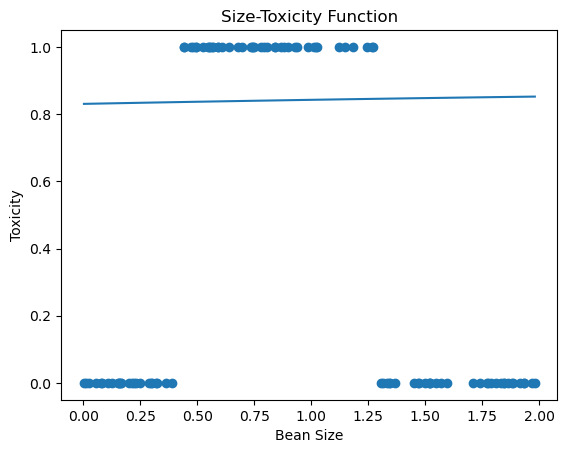

In [3]:
m=100
xs,ys=dataset.get_beans(m)

#配置图像
plt.title("Size-Toxicity Function",fontsize=12)
plt.xlabel("Bean Size")
plt.ylabel("Toxicity")


plt.scatter(xs,ys)

#第一层
#第一个神经元
w11_1=np.random.rand()
b1_1=np.random.rand()

#第二个神经元
w12_1=np.random.rand()
b2_1=np.random.rand()

#第二层
w11_2=np.random.rand()
w21_2=np.random.rand()
b1_2=np.random.rand()


#前向传播
def forward_progation(xs):
    z1_1=w11_1*xs+b1_1
    a1_1=sigmoid(z1_1)

    z2_1=w12_1*xs+b2_1
    a2_1=sigmoid(z2_1)

    z1_2=w11_2*a1_1+w21_2*a2_1+b1_2
    a1_2=sigmoid(z1_2)
    return a1_2,z1_2,a2_1,z2_1,a1_1,z1_1

a1_2,z1_2,a2_1,z2_1,a1_1,z1_1=forward_progation(xs)
plt.plot(xs,a1_2)

plt.show()

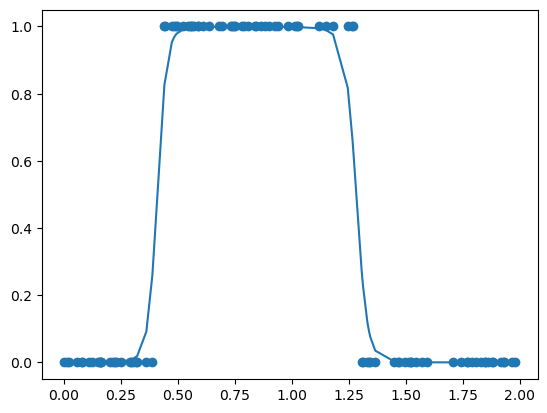

In [5]:
for m in range(5000):
    for i in range(100):
        x=xs[i]
        y=ys[i]
        #先来一次前向传播
        a1_2,z1_2,a2_1,z2_1,a1_1,z1_1=forward_progation(x)
        #反向传播
        #误差代价e
        e=(y-a1_2)**2
        #e最最后一个神经元的输出a1_2求导
        deda1_2=-2*(y-a1_2)
        
        da1_2dz1_2=a1_2*(1-a1_2)
        
        dz1_2dw11_2=a1_1
        dz1_2dw21_2=a2_1
        
        dedw11_2=deda1_2*da1_2dz1_2*dz1_2dw11_2
        dedw21_2=deda1_2*da1_2dz1_2*dz1_2dw21_2
        
        dz1_2db1_2=1
        dedb1_2=deda1_2*da1_2dz1_2*dz1_2db1_2
        
        dz1_2da1_1=w11_2
        da1_1dz1_1=a1_1*(1-a1_1)
        dz1_1dw11_1=x
        dedw11_1=deda1_2*da1_2dz1_2*dz1_2da1_1*da1_1dz1_1*dz1_1dw11_1
        dz1_1db1_1=1
        dedb1_1=deda1_2*da1_2dz1_2*dz1_2da1_1*da1_1dz1_1*dz1_1db1_1
        
        dz1_2da2_1=w21_2
        da2_1dz2_1=a2_1*(1-a2_1)
        dz2_1dw12_1=x
        dedw12_1=deda1_2*da1_2dz1_2*dz1_2da1_1*da2_1dz2_1*dz2_1dw12_1
        dz2_1db2_1=1
        dedb2_1=deda1_2*da1_2dz1_2*dz1_2da1_1*da2_1dz2_1*dz2_1db2_1
        
        alpha=0.03
        w11_2=w11_2-alpha*dedw11_2
        w21_2=w21_2-alpha*dedw21_2
        b1_2=b1_2-alpha*dedb1_2
        
        w12_1=w12_1-alpha*dedw12_1
        b2_1=b2_1-alpha*dedb2_1
        
        w11_1=w11_1-alpha*dedw11_1
        b1_1=b1_1-alpha*dedb1_1
        

plt.scatter(xs,ys)
a1_2,z1_2,a2_1,z2_1,a1_1,z1_1=forward_progation(xs)
plt.plot(xs,a1_2)
plt.show()